In [64]:
import matplotlib.pyplot as plt
import pandas as pd

seqDf = pd.read_csv('outSeq.txt', sep=',')
cudDf = pd.read_csv('outCuda.txt', sep=',')
cudShDf = pd.read_csv('outCudaShared.txt', sep=',')
cud2dDf = pd.read_csv('outCuda2D.txt', sep=',')

,n,steps,time
0,16,1000,26378
1,16,1000,24099
2,16,1000,25946
3,32,1000,94536
4,32,1000,99859
5,32,1000,95601
6,64,1000,339158
7,64,1000,358802
8,64,1000,357265
9,128,1000,1251215


In [75]:
import numpy as np

n = seqDf["n"].drop_duplicates().to_numpy()
avgDf = pd.DataFrame(columns=["Sequential","Cuda","Cuda Shared","Cuda 2D"], index=n)

for i in n:
    print(i)
    avgSeq = 0
    avgCud = 0
    avgCsh = 0
    avgC2d = 0

    for index, row in seqDf.loc[seqDf["n"] == i].iterrows():
        avgSeq += row["time"]
    avgSeq /= len(seqDf.loc[seqDf["n"] == i])
    avgSeq /= 1000

    for index, row in cudDf.loc[cudDf["n"] == i].iterrows():
        avgCud += row["time"]
    avgCud /= len(cudDf.loc[cudDf["n"] == i])
    avgCud /= 1000

    for index, row in cudShDf.loc[cudShDf["n"] == i].iterrows():
        avgCsh += row["time"]
    avgCsh /= len(cudShDf.loc[cudShDf["n"] == i])
    avgCsh /= 1000

    for index, row in cud2dDf.loc[cud2dDf["n"] == i].iterrows():
        avgC2d += row["time"]
    avgC2d /= len(cud2dDf.loc[cud2dDf["n"] == i])
    avgC2d /= 1000

    avgDf.loc[i] = {"Sequential": avgSeq,"Cuda": avgCud,"Cuda Shared": avgCsh,"Cuda 2D": avgC2d}


display(avgDf)

16
32
64
128


,Sequential,Cuda,Cuda Shared,Cuda 2D
16,25.474333,60.913,206.775667,42.024333
32,96.665333,107.613667,206.346667,68.676667
64,351.741667,165.932,204.745667,129.059667
128,1292.665333,267.679667,203.76,277.38


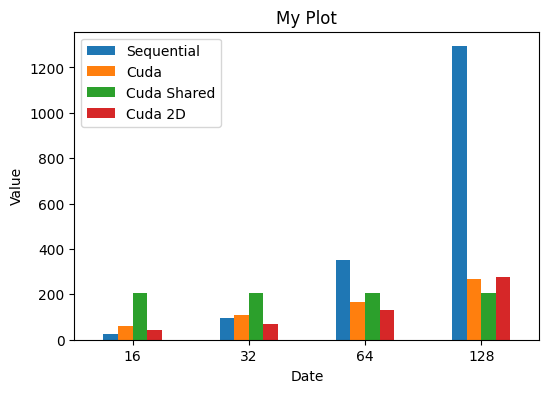

In [76]:
ax = avgDf.plot(kind='bar', rot=0, xlabel='Date', ylabel='Value', title='My Plot', figsize=(6, 4))